In [2]:
import sys 
sys.path.append("..")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from keras.layers import Input, Dense, Dropout
from sklearn.metrics import mean_squared_error
from keras.models import Model
from mylibrary import plot_ssp, creatMas, my_cross_val_score

In [30]:
ocean = 'BarentsSea'

In [31]:
with open('{0}/CZ.txt'.format(ocean), 'r') as f:
    line = f.readlines()
CZ=creatMas(line)
with open('{0}/zs.txt'.format(ocean), 'r') as f:
    line = f.readlines()
    line = line[:-1]
zs = [-int(a) for a in line]
N_cord=len(zs)

In [34]:
CZ_train, CZ_test = train_test_split(CZ, test_size=0.2)
CZ_train.shape, CZ_test.shape

((120, 12), (30, 12))

In [76]:
def AEncoder(input_dim, latent_dim):
    hidden_layer = int(input_dim * 0.8)
    
    inputs = Input(shape=(input_dim,))
    inp_layar1 = Dense(hidden_layer, activation='softplus',kernel_initializer='he_normal')(inputs)
    #np_layar1 = Dropout(0.1)(inp_layar1)
    
    encoded = Dense(latent_dim, activation='softplus', kernel_initializer='he_normal')(inp_layar1)
    
    dec_lay = Dense(hidden_layer,activation='linear', kernel_initializer='he_normal')(encoded)
    #dec_lay = Dropout(0.1)(dec_lay)
    decoded = Dense(input_dim,activation='linear', kernel_initializer='he_normal')(dec_lay)
    
    autoencoder = Model(inputs, decoded)
    encoder = Model(inputs, encoded)
    
    autoencoder = Model(inputs, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder, encoder

## Обучение на сырых данных

In [77]:
hidden_layer = int(N_cord*0.8)
autoencoder, encoder = AEncoder(N_cord, 5)

In [78]:
hist = autoencoder.fit(CZ_train, CZ_train,
                epochs=200,
                batch_size=64,
                shuffle=True,
                validation_data=(CZ_test, CZ_test))

Train on 120 samples, validate on 30 samples
Epoch 1/200
120/120 [==============================] - 3s 23ms/step - loss: 3257480.4000 - val_loss: 3060406.5000
Epoch 2/200
120/120 [==============================] - 0s 100us/step - loss: 3005239.7667 - val_loss: 2830525.7500
Epoch 3/200
120/120 [==============================] - 0s 121us/step - loss: 2782105.3333 - val_loss: 2629175.7500
Epoch 4/200
120/120 [==============================] - 0s 101us/step - loss: 2587143.7833 - val_loss: 2455422.5000
Epoch 5/200
120/120 [==============================] - 0s 115us/step - loss: 2419601.9167 - val_loss: 2307914.5000
Epoch 6/200
120/120 [==============================] - 0s 104us/step - loss: 2277852.3667 - val_loss: 2184911.5000
Epoch 7/200
120/120 [==============================] - 0s 71us/step - loss: 2160266.5833 - val_loss: 2100225.0000
Epoch 8/200
120/120 [==============================] - 0s 66us/step - loss: 2099725.0333 - val_loss: 2100101.2500
Epoch 9/200
120/120 [=================

Epoch 72/200
120/120 [==============================] - 0s 67us/step - loss: 2098852.8500 - val_loss: 2099298.5000
Epoch 73/200
120/120 [==============================] - 0s 76us/step - loss: 2098840.5000 - val_loss: 2099286.2500
Epoch 74/200
120/120 [==============================] - 0s 78us/step - loss: 2098828.3500 - val_loss: 2099273.7500
Epoch 75/200
120/120 [==============================] - 0s 67us/step - loss: 2098815.9500 - val_loss: 2099261.5000
Epoch 76/200
120/120 [==============================] - 0s 64us/step - loss: 2098803.6667 - val_loss: 2099249.2500
Epoch 77/200
120/120 [==============================] - 0s 67us/step - loss: 2098791.3833 - val_loss: 2099236.7500
Epoch 78/200
120/120 [==============================] - 0s 65us/step - loss: 2098779.0667 - val_loss: 2099224.5000
Epoch 79/200
120/120 [==============================] - 0s 64us/step - loss: 2098766.5833 - val_loss: 2099212.2500
Epoch 80/200
120/120 [==============================] - 0s 65us/step - loss: 209

Epoch 143/200
120/120 [==============================] - 0s 77us/step - loss: 2097965.6833 - val_loss: 2098410.7500
Epoch 144/200
120/120 [==============================] - 0s 75us/step - loss: 2097952.9500 - val_loss: 2098397.7500
Epoch 145/200
120/120 [==============================] - 0s 74us/step - loss: 2097940.1167 - val_loss: 2098385.2500
Epoch 146/200
120/120 [==============================] - 0s 81us/step - loss: 2097927.3667 - val_loss: 2098372.5000
Epoch 147/200
120/120 [==============================] - 0s 75us/step - loss: 2097914.5333 - val_loss: 2098359.5000
Epoch 148/200
120/120 [==============================] - 0s 79us/step - loss: 2097901.8500 - val_loss: 2098347.0000
Epoch 149/200
120/120 [==============================] - 0s 77us/step - loss: 2097888.8000 - val_loss: 2098333.7500
Epoch 150/200
120/120 [==============================] - 0s 80us/step - loss: 2097875.9667 - val_loss: 2098321.0000
Epoch 151/200
120/120 [==============================] - 0s 85us/step - 

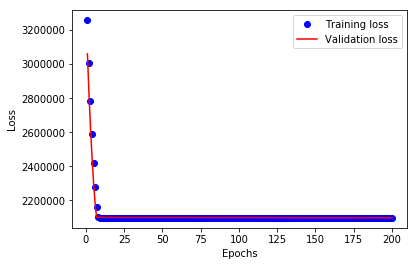

In [79]:
history_dict = hist.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

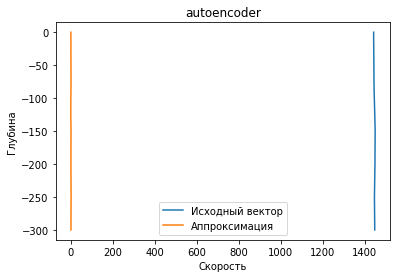

In [80]:
n = 7
test = CZ_test[n]
predict = autoencoder.predict(CZ_test[n:n+1])
plot_ssp(test, predict[0], zs, 'autoencoder')
plt.show()

## С использованием нормировки данных

In [89]:
scaler = StandardScaler()
CZ_train_std = scaler.fit_transform(CZ_train)
CZ_test_std = scaler.transform(CZ_test)

In [90]:
autoencoder_std, encoder_std = AEncoder(N_cord, 3)

In [91]:
hist = autoencoder_std.fit(CZ_train_std, CZ_train_std,
                epochs=750,
                batch_size=64,
                shuffle=True,
                validation_data=(CZ_test_std, CZ_test_std))

Train on 120 samples, validate on 30 samples
Epoch 1/750
120/120 [==============================] - 3s 24ms/step - loss: 2.2275 - val_loss: 2.3342
Epoch 2/750
120/120 [==============================] - 0s 106us/step - loss: 2.1329 - val_loss: 2.2501
Epoch 3/750
120/120 [==============================] - 0s 121us/step - loss: 2.0397 - val_loss: 2.1715
Epoch 4/750
120/120 [==============================] - 0s 109us/step - loss: 1.9525 - val_loss: 2.0985
Epoch 5/750
120/120 [==============================] - 0s 104us/step - loss: 1.8686 - val_loss: 2.0306
Epoch 6/750
120/120 [==============================] - 0s 88us/step - loss: 1.7955 - val_loss: 1.9676
Epoch 7/750
120/120 [==============================] - 0s 74us/step - loss: 1.7274 - val_loss: 1.9087
Epoch 8/750
120/120 [==============================] - 0s 77us/step - loss: 1.6628 - val_loss: 1.8538
Epoch 9/750
120/120 [==============================] - 0s 73us/step - loss: 1.6051 - val_loss: 1.8025
Epoch 10/750
120/120 [===========

120/120 [==============================] - 0s 65us/step - loss: 0.1811 - val_loss: 0.1661
Epoch 160/750
120/120 [==============================] - 0s 71us/step - loss: 0.1801 - val_loss: 0.1649
Epoch 161/750
120/120 [==============================] - 0s 57us/step - loss: 0.1790 - val_loss: 0.1637
Epoch 162/750
120/120 [==============================] - 0s 71us/step - loss: 0.1780 - val_loss: 0.1625
Epoch 163/750
120/120 [==============================] - 0s 64us/step - loss: 0.1770 - val_loss: 0.1614
Epoch 164/750
120/120 [==============================] - 0s 71us/step - loss: 0.1760 - val_loss: 0.1603
Epoch 165/750
120/120 [==============================] - 0s 68us/step - loss: 0.1751 - val_loss: 0.1592
Epoch 166/750
120/120 [==============================] - 0s 70us/step - loss: 0.1741 - val_loss: 0.1582
Epoch 167/750
120/120 [==============================] - 0s 64us/step - loss: 0.1733 - val_loss: 0.1571
Epoch 168/750
120/120 [==============================] - 0s 66us/step - loss: 

Epoch 238/750
120/120 [==============================] - 0s 70us/step - loss: 0.1384 - val_loss: 0.1211
Epoch 239/750
120/120 [==============================] - 0s 69us/step - loss: 0.1380 - val_loss: 0.1208
Epoch 240/750
120/120 [==============================] - 0s 69us/step - loss: 0.1377 - val_loss: 0.1205
Epoch 241/750
120/120 [==============================] - 0s 70us/step - loss: 0.1374 - val_loss: 0.1203
Epoch 242/750
120/120 [==============================] - 0s 62us/step - loss: 0.1372 - val_loss: 0.1200
Epoch 243/750
120/120 [==============================] - 0s 68us/step - loss: 0.1369 - val_loss: 0.1197
Epoch 244/750
120/120 [==============================] - 0s 66us/step - loss: 0.1366 - val_loss: 0.1194
Epoch 245/750
120/120 [==============================] - 0s 69us/step - loss: 0.1363 - val_loss: 0.1191
Epoch 246/750
120/120 [==============================] - 0s 66us/step - loss: 0.1360 - val_loss: 0.1189
Epoch 247/750
120/120 [==============================] - 0s 72us

Epoch 317/750
120/120 [==============================] - 0s 72us/step - loss: 0.1171 - val_loss: 0.1021
Epoch 318/750
120/120 [==============================] - 0s 72us/step - loss: 0.1168 - val_loss: 0.1018
Epoch 319/750
120/120 [==============================] - 0s 68us/step - loss: 0.1166 - val_loss: 0.1017
Epoch 320/750
120/120 [==============================] - 0s 61us/step - loss: 0.1163 - val_loss: 0.1015
Epoch 321/750
120/120 [==============================] - 0s 70us/step - loss: 0.1160 - val_loss: 0.1013
Epoch 322/750
120/120 [==============================] - 0s 69us/step - loss: 0.1158 - val_loss: 0.1011
Epoch 323/750
120/120 [==============================] - 0s 69us/step - loss: 0.1155 - val_loss: 0.1009
Epoch 324/750
120/120 [==============================] - 0s 72us/step - loss: 0.1153 - val_loss: 0.1007
Epoch 325/750
120/120 [==============================] - 0s 62us/step - loss: 0.1150 - val_loss: 0.1004
Epoch 326/750
120/120 [==============================] - 0s 69us

Epoch 396/750
120/120 [==============================] - 0s 65us/step - loss: 0.0979 - val_loss: 0.0875
Epoch 397/750
120/120 [==============================] - 0s 69us/step - loss: 0.0977 - val_loss: 0.0874
Epoch 398/750
120/120 [==============================] - 0s 67us/step - loss: 0.0975 - val_loss: 0.0872
Epoch 399/750
120/120 [==============================] - 0s 63us/step - loss: 0.0973 - val_loss: 0.0870
Epoch 400/750
120/120 [==============================] - 0s 73us/step - loss: 0.0971 - val_loss: 0.0869
Epoch 401/750
120/120 [==============================] - 0s 58us/step - loss: 0.0968 - val_loss: 0.0867
Epoch 402/750
120/120 [==============================] - 0s 70us/step - loss: 0.0966 - val_loss: 0.0867
Epoch 403/750
120/120 [==============================] - 0s 66us/step - loss: 0.0964 - val_loss: 0.0865
Epoch 404/750
120/120 [==============================] - 0s 75us/step - loss: 0.0962 - val_loss: 0.0864
Epoch 405/750
120/120 [==============================] - 0s 57us

Epoch 475/750
120/120 [==============================] - 0s 68us/step - loss: 0.0826 - val_loss: 0.0777
Epoch 476/750
120/120 [==============================] - 0s 71us/step - loss: 0.0824 - val_loss: 0.0776
Epoch 477/750
120/120 [==============================] - 0s 64us/step - loss: 0.0823 - val_loss: 0.0775
Epoch 478/750
120/120 [==============================] - 0s 70us/step - loss: 0.0821 - val_loss: 0.0774
Epoch 479/750
120/120 [==============================] - 0s 61us/step - loss: 0.0819 - val_loss: 0.0772
Epoch 480/750
120/120 [==============================] - 0s 72us/step - loss: 0.0818 - val_loss: 0.0771
Epoch 481/750
120/120 [==============================] - 0s 66us/step - loss: 0.0816 - val_loss: 0.0771
Epoch 482/750
120/120 [==============================] - 0s 74us/step - loss: 0.0815 - val_loss: 0.0770
Epoch 483/750
120/120 [==============================] - 0s 63us/step - loss: 0.0813 - val_loss: 0.0769
Epoch 484/750
120/120 [==============================] - 0s 73us

120/120 [==============================] - 0s 72us/step - loss: 0.0666 - val_loss: 0.0678
Epoch 632/750
120/120 [==============================] - 0s 66us/step - loss: 0.0665 - val_loss: 0.0678
Epoch 633/750
120/120 [==============================] - 0s 71us/step - loss: 0.0664 - val_loss: 0.0677
Epoch 634/750
120/120 [==============================] - 0s 70us/step - loss: 0.0664 - val_loss: 0.0677
Epoch 635/750
120/120 [==============================] - 0s 68us/step - loss: 0.0663 - val_loss: 0.0676
Epoch 636/750
120/120 [==============================] - 0s 68us/step - loss: 0.0663 - val_loss: 0.0676
Epoch 637/750
120/120 [==============================] - 0s 70us/step - loss: 0.0662 - val_loss: 0.0676
Epoch 638/750
120/120 [==============================] - 0s 61us/step - loss: 0.0662 - val_loss: 0.0675
Epoch 639/750
120/120 [==============================] - 0s 76us/step - loss: 0.0661 - val_loss: 0.0674
Epoch 640/750
120/120 [==============================] - 0s 59us/step - loss: 

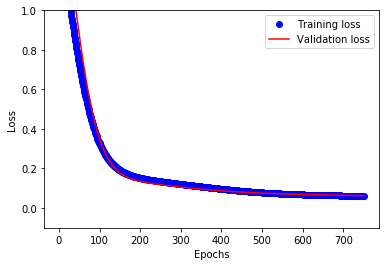

In [92]:
history_dict = hist.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim((-0.1,1))
plt.legend()
plt.show()

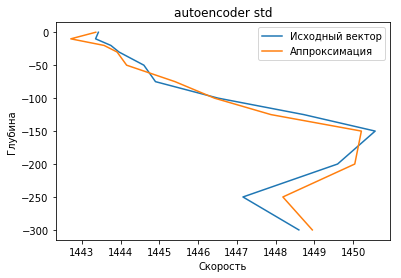

In [93]:
n = 7
test = CZ_test[n]
predict_std = autoencoder_std.predict(CZ_test_std[n:n+1])
predict = scaler.inverse_transform(predict_std)
plot_ssp(test, predict[0], zs, 'autoencoder std')

In [94]:
import pylab

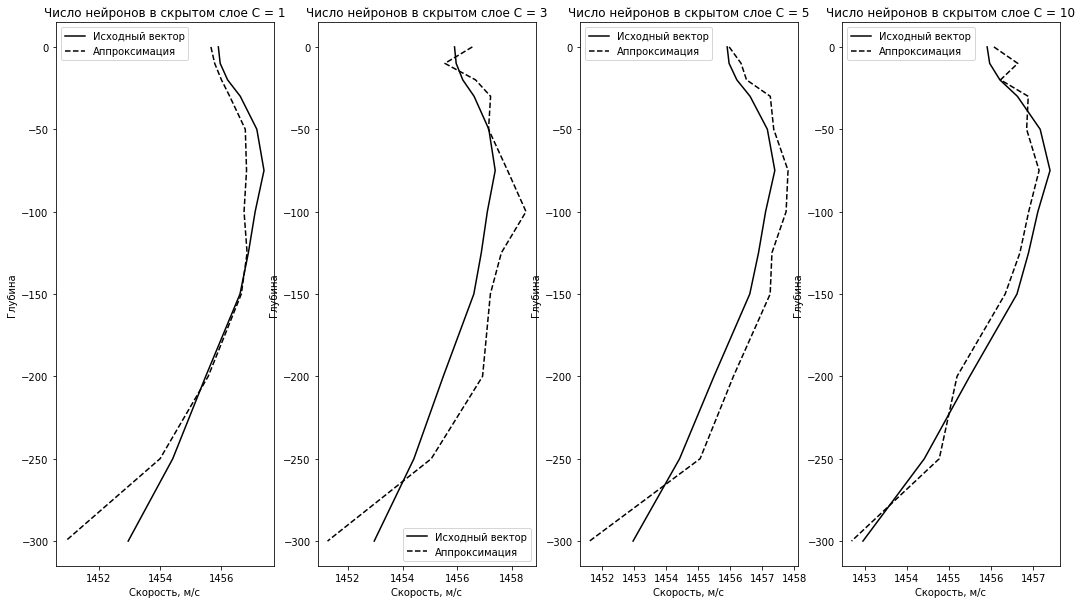

In [96]:
nc = [1, 3, 5, 10]
mse = []
i = 1
plt.figure(figsize=(18,10))
for nco in nc:
    autoencoder_std, encoder_std = AEncoder(N_cord, nco)
    scaler = StandardScaler()
    CZ_train_std = scaler.fit_transform(CZ_train)
    CZ_test_std = scaler.fit_transform(CZ_test)
    hist = autoencoder_std.fit(CZ_train_std, CZ_train_std,
                epochs=750,
                batch_size=64,
                shuffle=True,
                validation_data=(CZ_test_std, CZ_test_std),verbose=0)

    predict_std = autoencoder_std.predict(CZ_test_std)
    predict = scaler.inverse_transform(predict_std)
    
    pylab.subplot(1, 4,i)
    pylab.plot(CZ_test[4], zs, c='k')
    pylab.plot(predict[4], zs,'k--', c='k')
    mse.append(mean_squared_error(CZ_test[4], predict[4]))
    pylab.legend(['Исходный вектор', 'Аппроксимация'])
    pylab.ylabel('Глубина')
    pylab.xlabel('Скорость, м/с')
    plt.title('Число нейронов в скрытом слое С = {}'.format(nco))
    i += 1
pylab.show()

In [97]:
mse

[0.43453394221509506,
 0.8083710595600325,
 0.37250103331905376,
 0.09665038043785533]

**сравнение с PCA**

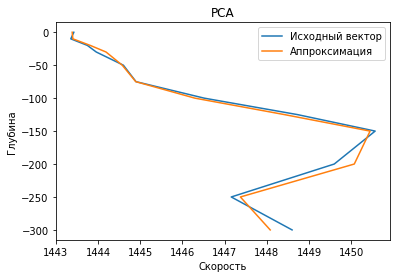

In [98]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=3)
pca.fit(CZ_train)
CZ_reconstructed_pca = pca.inverse_transform(pca.transform(CZ_test))
reduced = CZ_reconstructed_pca
plot_ssp(CZ_test[n], reduced[n], zs, 'PCA')

## Сжатие в размерность 2

In [99]:
autoencoder_2dim, encoder_2dim = AEncoder(N_cord, 2)

In [100]:
hist = autoencoder_2dim.fit(CZ_train_std, CZ_train_std,
                epochs=500,
                batch_size=64,
                shuffle=True,
                validation_data=(CZ_test_std, CZ_test_std))

Train on 120 samples, validate on 30 samples
Epoch 1/500
120/120 [==============================] - 3s 28ms/step - loss: 10.3921 - val_loss: 9.8572
Epoch 2/500
120/120 [==============================] - 0s 100us/step - loss: 9.8946 - val_loss: 9.3841
Epoch 3/500
120/120 [==============================] - 0s 93us/step - loss: 9.4201 - val_loss: 8.9367
Epoch 4/500
120/120 [==============================] - 0s 77us/step - loss: 8.9785 - val_loss: 8.5157
Epoch 5/500
120/120 [==============================] - 0s 74us/step - loss: 8.5377 - val_loss: 8.1202
Epoch 6/500
120/120 [==============================] - 0s 77us/step - loss: 8.1453 - val_loss: 7.7462
Epoch 7/500
120/120 [==============================] - 0s 84us/step - loss: 7.7636 - val_loss: 7.3944
Epoch 8/500
120/120 [==============================] - 0s 81us/step - loss: 7.4093 - val_loss: 7.0630
Epoch 9/500
120/120 [==============================] - 0s 79us/step - loss: 7.0783 - val_loss: 6.7510
Epoch 10/500
120/120 [=============

120/120 [==============================] - 0s 77us/step - loss: 0.3269 - val_loss: 0.3003
Epoch 160/500
120/120 [==============================] - 0s 79us/step - loss: 0.3233 - val_loss: 0.2966
Epoch 161/500
120/120 [==============================] - 0s 79us/step - loss: 0.3198 - val_loss: 0.2929
Epoch 162/500
120/120 [==============================] - 0s 80us/step - loss: 0.3164 - val_loss: 0.2894
Epoch 163/500
120/120 [==============================] - 0s 83us/step - loss: 0.3130 - val_loss: 0.2859
Epoch 164/500
120/120 [==============================] - 0s 77us/step - loss: 0.3096 - val_loss: 0.2825
Epoch 165/500
120/120 [==============================] - 0s 83us/step - loss: 0.3063 - val_loss: 0.2792
Epoch 166/500
120/120 [==============================] - 0s 79us/step - loss: 0.3031 - val_loss: 0.2760
Epoch 167/500
120/120 [==============================] - 0s 77us/step - loss: 0.3001 - val_loss: 0.2728
Epoch 168/500
120/120 [==============================] - 0s 82us/step - loss: 

Epoch 238/500
120/120 [==============================] - 0s 66us/step - loss: 0.1966 - val_loss: 0.1633
Epoch 239/500
120/120 [==============================] - 0s 79us/step - loss: 0.1960 - val_loss: 0.1627
Epoch 240/500
120/120 [==============================] - 0s 77us/step - loss: 0.1955 - val_loss: 0.1620
Epoch 241/500
120/120 [==============================] - 0s 75us/step - loss: 0.1950 - val_loss: 0.1615
Epoch 242/500
120/120 [==============================] - 0s 77us/step - loss: 0.1945 - val_loss: 0.1609
Epoch 243/500
120/120 [==============================] - 0s 68us/step - loss: 0.1940 - val_loss: 0.1603
Epoch 244/500
120/120 [==============================] - 0s 83us/step - loss: 0.1935 - val_loss: 0.1597
Epoch 245/500
120/120 [==============================] - 0s 69us/step - loss: 0.1930 - val_loss: 0.1592
Epoch 246/500
120/120 [==============================] - 0s 74us/step - loss: 0.1925 - val_loss: 0.1587
Epoch 247/500
120/120 [==============================] - 0s 69us

Epoch 395/500
120/120 [==============================] - 0s 70us/step - loss: 0.1696 - val_loss: 0.1300
Epoch 396/500
120/120 [==============================] - 0s 72us/step - loss: 0.1695 - val_loss: 0.1299
Epoch 397/500
120/120 [==============================] - 0s 79us/step - loss: 0.1695 - val_loss: 0.1299
Epoch 398/500
120/120 [==============================] - 0s 68us/step - loss: 0.1694 - val_loss: 0.1298
Epoch 399/500
120/120 [==============================] - 0s 80us/step - loss: 0.1694 - val_loss: 0.1297
Epoch 400/500
120/120 [==============================] - 0s 72us/step - loss: 0.1693 - val_loss: 0.1297
Epoch 401/500
120/120 [==============================] - 0s 75us/step - loss: 0.1693 - val_loss: 0.1296
Epoch 402/500
120/120 [==============================] - 0s 73us/step - loss: 0.1692 - val_loss: 0.1295
Epoch 403/500
120/120 [==============================] - 0s 71us/step - loss: 0.1692 - val_loss: 0.1295
Epoch 404/500
120/120 [==============================] - 0s 74us

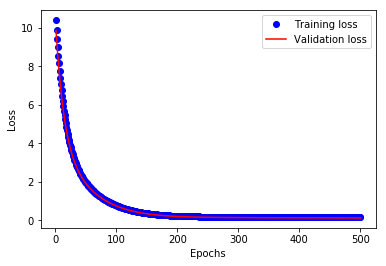

In [102]:
history_dict = hist.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.ylim((min(acc_values)-5,200))
plt.legend()
plt.show()

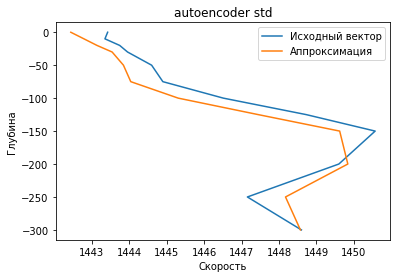

In [103]:
n = 7
test = CZ_test[n]
predict_std = autoencoder_2dim.predict(CZ_test_std[n:n+1])
predict = scaler.inverse_transform(predict_std)
plot_ssp(test, predict[0], zs, 'autoencoder std')

**Представление на плоскости**

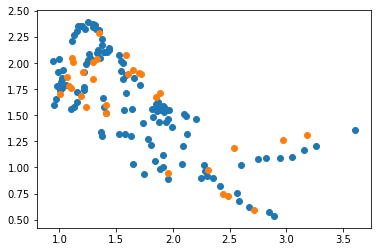

In [104]:
train_embedding = encoder_2dim.predict(CZ_train_std)
test_embedding = encoder_2dim.predict(CZ_test_std)
plt.scatter(train_embedding[:,0], train_embedding[:,1])
plt.scatter(test_embedding[:,0], test_embedding[:,1])
plt.show()

## Зависимость ошибки от размености представления

In [105]:
kf = KFold(n_splits=5)
scaler = StandardScaler()
MSEmean = []
std_mean = []
Dim = list(range(1, N_cord+1))
for dim in Dim:
    autoencoder, encoder = AEncoder(N_cord, dim)
    MSE = []
    for train, test in kf.split(CZ):
        CZ_train, CZ_test = CZ[train], CZ[test]
        CZ_train_std = scaler.fit_transform(CZ_train)
        CZ_test_std = scaler.transform(CZ_test)
        
        autoencoder.fit(CZ_train_std, CZ_train_std, epochs=200,batch_size=64, shuffle=True, verbose=0)
        predict = autoencoder.predict(CZ_test_std)
        predict = scaler.inverse_transform(predict)
        mse = mean_squared_error(CZ_test, predict)
        MSE.append(mse)
    MSEmean.append(np.mean(MSE))
    std_mean.append(np.std(MSE))
    
MSEmean = np.array(MSEmean)
std_mean = np.array(std_mean)

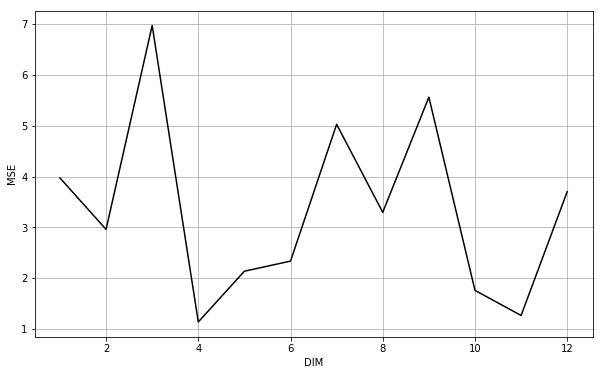

In [66]:
plt.figure(figsize=(10,6))
plt.plot(Dim, MSEmean, 'k')
#plt.fill_between(Dim, MSEmean - std_mean / 2, MSEmean + std_mean / 2)
plt.ylabel("MSE")
plt.xlabel("DIM")
plt.grid(True)
plt.show()

In [106]:
dim_svd = list(range(3,N_cord))

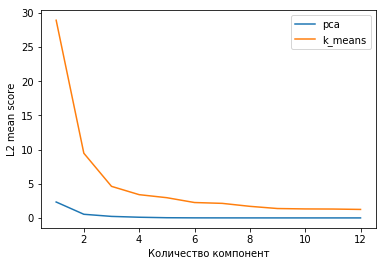

In [107]:
CV, CV1, CV2 = [], [], []
X = range(1,N_cord+1)
for i in range(1,N_cord+1):
    CV.append(np.mean(my_cross_val_score(CZ, n_comp = i, model = 'pca')))
    CV1.append(np.mean(my_cross_val_score(CZ, n_comp = i, model = 'k_means')))
CV2 = [np.mean(my_cross_val_score(CZ, n_comp = i, model = 'k_svd')) for i in range(3,N_cord)]
plt.plot(X,CV)
plt.plot(X,CV1)
plt.legend(['pca', 'k_means'])
plt.ylabel('L2 mean score')
plt.xlabel('Количество компонент')
plt.show()

In [110]:
from sklearn.decomposition import DictionaryLearning

kf = KFold(n_splits=5)
Msem = []
Dim = list(range(1, N_cord+1))
for dim in Dim:
    d = DictionaryLearning(n_components=dim,max_iter=15)
    MSE = []
    for train, test in kf.split(CZ):
        CZ_train, CZ_test = CZ[train], CZ[test]
        CZ_train_std = scaler.fit_transform(CZ_train)
        
        d.fit(CZ_train)
        comp = d.components_
        reduced = d.transform(CZ_test).dot(comp)
        mse = mean_squared_error(CZ_test, reduced)
        MSE.append(mse)
    Msem.append(np.mean(MSE))
    
Msem = np.array(Msem)

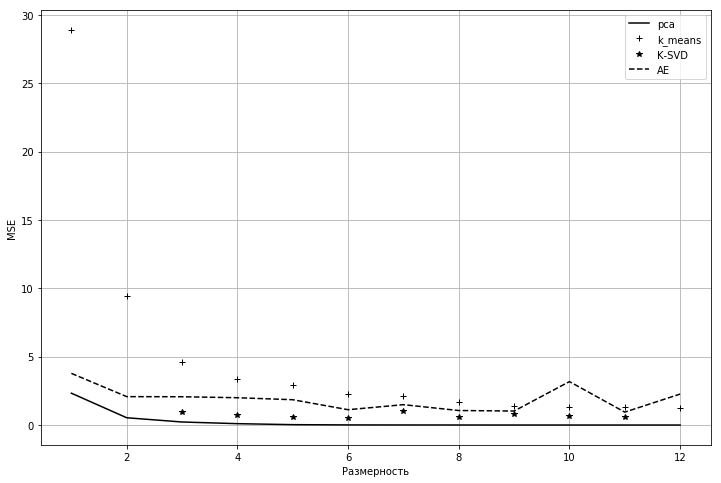

In [111]:
plt.figure(figsize=(12,8))
plt.plot(X,CV, 'k')
plt.plot(X,CV1, '+', c='k')
plt.plot(dim_svd, CV2, '*' 'k')
plt.plot(Dim, MSEmean, 'k--')
plt.legend(['pca', 'k_means', 'K-SVD', 'AE'])
plt.ylabel('MSE')
plt.xlabel('Размерность')
plt.grid(True)
plt.show()